<div style="align: center;">
    <br>
    <img src="https://www.nyc.gov/assets/tlc/images/content/hero/MRP-Closing-Week.jpg" style="display:block; margin:auto; width:65%; height:250px;">
</div><br><br> 

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>TLC Trip Record Data</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Module: Ride Duration Prediction using Regression Analysis<br>(EDA and Linear Regression Model Training)</p>    
</div>

**Dataset Info**


**Context**

Yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

For-Hire Vehicle (“FHV”) trip records include fields capturing the dispatching base license number and the pick-up date, time, and taxi zone location ID (shape file below). These records are generated from the FHV Trip Record submissions made by bases. Note: The TLC publishes base trip record data as submitted by the bases, and we cannot guarantee or confirm their accuracy or completeness. Therefore, this may not represent the total amount of trips dispatched by all TLC-licensed bases. The TLC performs routine reviews of the records and takes enforcement actions when necessary to ensure, to the extent possible, complete and accurate information.


**ATTENTION!**

On 05/13/2022, we are making the following changes to trip record files:

- All files will be stored in the PARQUET format. Please see the ‘Working With PARQUET Format’ under the Data Dictionaries and MetaData section.
- Trip data will be published monthly (with two months delay) instead of bi-annually.
- HVFHV files will now include 17 more columns (please see High Volume FHV Trips Dictionary for details). Additional columns will be added to the old files as well. The earliest date to include additional columns: February 2019.
- Yellow trip data will now include 1 additional column (‘airport_fee’, please see Yellow Trips Dictionary for details). The additional column will be added to the old files as well. The earliest date to include the additional column: January 2011.


**Download the data for January and February 2022**

Dataset: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page


**Data Dictionaries and MetaData**

- We'll use the same `NYC taxi dataset`, but instead of "Green Taxi Trip Records", we'll use `"Yellow Taxi Trip Records"`.

> `Yellow Trips Data Dictionary`: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

**TASK**

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.<br>

Questions: https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/01-intro/homework.md


**Table of Content**


1. Import Libraries and Ingest Data


2. Recognizing and Understanding Data
    - Q1: Read the January "PARQUET" Files. How many columns are there?
    - Q2: Calculation of Duration in Minutes?


3. Exloratory Data Analysis
    - Q3: Dropping Outliers


4. Data Preprocessing
    - Q4. One-hot encoding

    
5. Parametric Model Training   
    1. Implemet Linear Regression
        - Q5. Implemet Vanilla Linear Regression Model Training           
        - Q6. Evaluation of Model Test Data
        
        
6. Save Submission

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

**pip freeze**

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats

import pickle
from glob import glob
from tqdm import tqdm

# memory management performs garbage collection 
import gc
gc.collect()

0

## Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [6]:
# "Yellow Taxi Trip Records" Download the data for January and February 2022
!curl -s --create-dirs --output-dir "trip-data" -O https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
!curl -s --create-dirs --output-dir "trip-data" -O https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

In [7]:
glob('trip-data/yellow*.parquet')

['trip-data/yellow_tripdata_2022-01.parquet',
 'trip-data/yellow_tripdata_2022-02.parquet']

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

## Q1: Read the January "PARQUET" Files. 

**How many columns are there?**

In [4]:
# !conda install -c conda-forge pyarrow
# !conda install -c conda-forge fastparquet

In [5]:
# Read the data for (January 2022)
train_df = pd.read_parquet('trip-data/yellow_tripdata_2022-01.parquet')

# apply this model to the validation dataset (February 2022)
test_df  = pd.read_parquet('trip-data/yellow_tripdata_2022-02.parquet')

train_df.shape, test_df.shape

((2463931, 19), (2979431, 19))

In [6]:
print("Shape of DataFrame:", train_df.shape)
train_df.head()

Shape of DataFrame: (2463931, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [7]:
print("Shape of DataFrame:", test_df.shape)
test_df.head()

Shape of DataFrame: (2979431, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979431 entries, 0 to 2979430
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [10]:
# train_df.describe(datetime_is_numeric=True).T
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,2463931.0,1.707819,1.0,1.0,2.0,2.0,6.0,0.502137
tpep_pickup_datetime,2463931,2022-01-17 01:19:51.689726208,2008-12-31 22:23:09,2022-01-09 15:37:41,2022-01-17 12:11:45,2022-01-24 13:49:37.500000,2022-05-18 20:41:57,NaN
tpep_dropoff_datetime,2463931,2022-01-17 01:34:04.421900544,2008-12-31 23:06:56,2022-01-09 15:50:50.500000,2022-01-17 12:23:49,2022-01-24 14:02:51,2022-05-18 20:47:45,NaN
passenger_count,2392428.0,1.389453,0.0,1.0,1.0,1.0,9.0,0.982969
trip_distance,2463931.0,5.372751,0.0,1.04,1.74,3.13,306159.28,547.871404
RatecodeID,2392428.0,1.415507,1.0,1.0,1.0,1.0,99.0,5.917573
PULocationID,2463931.0,166.076809,1.0,132.0,162.0,234.0,265.0,65.468057
DOLocationID,2463931.0,163.580716,1.0,113.0,162.0,236.0,265.0,70.790159
payment_type,2463931.0,1.194449,0.0,1.0,1.0,1.0,5.0,0.500178
fare_amount,2463931.0,12.946484,-480.0,6.5,9.0,14.0,401092.32,255.814887


In [11]:
test_df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,2979431.0,1.710175,1.0,1.0,2.0,2.0,6.0,0.501401
tpep_pickup_datetime,2979431,2022-02-15 07:55:36.811104256,2003-01-01 00:10:06,2022-02-08 15:30:42,2022-02-15 11:52:28,2022-02-22 12:31:14,2022-05-24 17:41:50,NaN
tpep_dropoff_datetime,2979431,2022-02-15 08:11:16.031742976,2003-01-01 12:38:59,2022-02-08 15:47:17,2022-02-15 12:07:51,2022-02-22 12:46:23,2022-05-24 17:43:27,NaN
passenger_count,2877693.0,1.392135,0.0,1.0,1.0,1.0,9.0,0.984123
trip_distance,2979431.0,5.852134,0.0,1.08,1.79,3.2,348798.53,642.530368
RatecodeID,2877693.0,1.423419,1.0,1.0,1.0,1.0,99.0,6.017545
PULocationID,2979431.0,165.531488,1.0,132.0,162.0,234.0,265.0,65.609659
DOLocationID,2979431.0,163.434221,1.0,113.0,162.0,234.0,265.0,70.420229
payment_type,2979431.0,1.173644,0.0,1.0,1.0,1.0,5.0,0.495248
fare_amount,2979431.0,13.126442,-600.0,6.5,9.5,14.5,655.35,12.046193


## Q2: Calculation of Duration in Minutes?

<p>Now let's compute the duration variable. It should contain the <mark>duration of a ride in minutes</mark>.</p>

**What's the <mark>standard deviation</mark> of the trips duration in January?**

In [12]:
# Calculate duration
train_df['duration'] = train_df['tpep_dropoff_datetime'] - train_df['tpep_pickup_datetime']
test_df['duration']  = test_df['tpep_dropoff_datetime']  - test_df['tpep_pickup_datetime']

# Display the duration
print(train_df['duration'])

0         0 days 00:17:49
1         0 days 00:08:24
2         0 days 00:08:58
3         0 days 00:10:02
4         0 days 00:37:32
                ...      
2463926   0 days 00:05:58
2463927   0 days 00:10:39
2463928   0 days 00:11:00
2463929   0 days 00:12:03
2463930   0 days 00:27:00
Name: duration, Length: 2463931, dtype: timedelta64[ns]


In [13]:
# Convert duration to minutes
train_df['duration_minutes'] = train_df['duration'].dt.total_seconds() / 60
test_df['duration_minutes']  = test_df['duration'].dt.total_seconds() / 60

# Display the duration in minutes
print(train_df['duration_minutes'])

0          17.816667
1           8.400000
2           8.966667
3          10.033333
4          37.533333
             ...    
2463926     5.966667
2463927    10.650000
2463928    11.000000
2463929    12.050000
2463930    27.000000
Name: duration_minutes, Length: 2463931, dtype: float64


In [14]:
# Compute standard deviation of population via Pandas
std_dev = train_df['duration_minutes'].std(ddof=0)

# Round the result to 2 decimal places
std_dev = round(std_dev, 2)

# Display the standard deviation
print("standard deviation of the trips duration:", std_dev)

standard deviation of the trips duration: 46.45


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Exloratory Data Analysis</strong></h1>   
</div>

## Q3. Dropping Outliers

<p>Next, we need to <mark>check the distribution</mark> of the duration variable. There are some outliers. Let's remove them and <mark>keep only</mark> the records where the duration was <mark>between 1 and 60 minutes</mark> (inclusive).</p>

**What fraction of the records left after you dropped the outliers?**

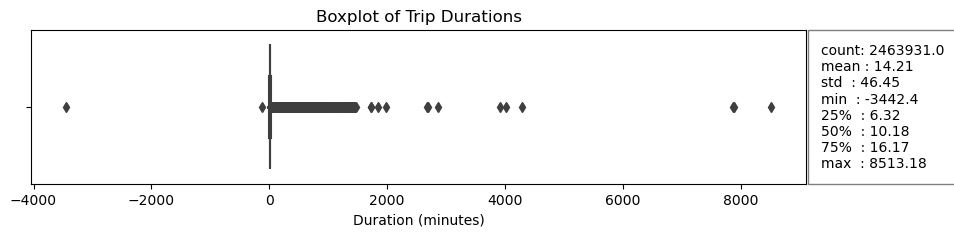

In [15]:
# Create a boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=train_df['duration_minutes'])

# Set title and labels
plt.title("Boxplot of Trip Durations")
plt.xlabel("Duration (minutes)")

# Generate description
description      = train_df['duration_minutes'].describe().round(2)
description_text = "\n".join(f"{stat:<5}: {value}" for stat, value in description.items())

# Add description text
plt.figtext(.915, 0.19, description_text, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 9.5})

# Display the plot
plt.show()

In [16]:
# Specify percentiles for description
train_df[["duration_minutes"]].describe(percentiles=[0.01, 0.0122, 0.99, 0.9949]).T

,count,mean,std,min,1%,1.2%,50%,99%,99.5%,max
duration_minutes,2463931.0,14.212203,46.445305,-3442.4,0.583333,1.0,10.183333,50.85,60.0,8513.183333


In [17]:
# Define criteria for outliers 
lower_threshold = 1   
upper_threshold = 60  

# Filter DataFrame based on outlier criteria
filtered_train_df = train_df[
    (train_df['duration_minutes'] >= lower_threshold) & 
    (train_df['duration_minutes'] <= upper_threshold)
]

# Filter DataFrame based on outlier criteria
filtered_test_df = test_df[
    (test_df['duration_minutes'] >= lower_threshold) & 
    (test_df['duration_minutes'] <= upper_threshold)
]

# Calculate the fraction of records left after dropping outliers
fraction_left = len(filtered_train_df) / len(train_df)
fraction_left = round(fraction_left, 2)

# Display the fraction
print("fraction of the records:", fraction_left)

fraction of the records: 0.98


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>4. Data Preprocessing</strong></h1>   
</div>

## Q4. One-hot encoding

<p>Let's apply <mark>one-hot encoding</mark> to the <mark>pickup</mark> and <mark>dropoff location IDs</mark>.<u>We'll use only these two features for our model</u>.</p>

- Turn the dataframe into a list of dictionaries
- Fit a dictionary vectorizer
- Get a feature matrix from it

**What's the dimensionality of this matrix (number of columns)?**

In [18]:
from sklearn.feature_extraction import DictVectorizer

# Define the categorical columns
categorical = ['PULocationID', 'DOLocationID']

# Extract the pickup and dropoff location IDs into a list of dictionaries
locations_dict_train = filtered_train_df[categorical].astype(str).to_dict(orient='records')
locations_dict_test  = filtered_test_df[categorical].astype(str).to_dict(orient='records')

# Initialize the DictVectorizer
vectorizer = DictVectorizer(sparse=True)

# Perform one-hot encoding on the location IDs
feature_matrix_train = vectorizer.fit_transform(locations_dict_train)
feature_matrix_test  = vectorizer.transform(locations_dict_test)

# Get the dimensionality of the feature matrix
num_columns = feature_matrix_train.shape[1]

# Display the dimensionality
print("number of columns:", num_columns)

number of columns: 515


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>5. Parametric Model Training</strong></h1>   
</div>

## Implemet Linear Regression

### Vanilla Linear Regression


**Q5. Implemet Vanilla Linear Regression Model Training**

- Now let's use the <mark>feature matrix</mark> from the previous step to train a model.
- Train a <mark>plain linear regression model</mark> with default parameters
- Calculate the <mark>RMSE</mark> of the model on the <mark>training data</mark>

**What's the RMSE on train?**

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define the target variable
target = 'duration_minutes'

# Create the feature matrix and target array
X_train = feature_matrix_train
y_train = filtered_train_df[target]

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable
y_train_pred = model.predict(X_train)
y_train_pred

array([ 9.45450433, 16.13442829, 13.81654061, ..., 10.61549065,
       10.29014437, 26.61826112])

In [21]:
!mkdir -p "models"

with open('models/ride_duration_lin_reg_ohe_model.bin', 'wb') as f_out:
    pickle.dump((vectorizer, model), f_out)

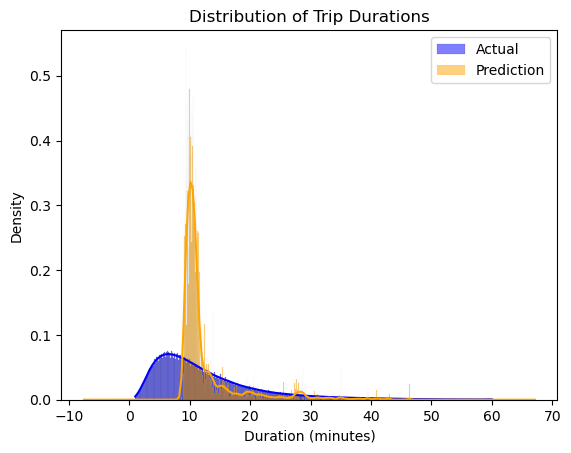

In [22]:
# Create a histogram plot using seaborn with a kernel density estimate line
sns.histplot(
    y_train,
    stat="density", kde=True,
    bins='auto', discrete=False,
    label='Actual', color='blue'
)
sns.histplot(
    y_train_pred,
    stat="density", kde=True,
    bins='auto', discrete=False,
    label='Prediction', color='orange'
)

# Set title and labels
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (minutes)")

# Display the legend and plot
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Display the rounded RMSE
print("RMSE on train:", round(rmse, 2))

RMSE on train: 6.99


### Q6. Evaluation of Model Test Data

- Now let's apply this model to the <mark>validation dataset (February 2022)</mark>.

**What's the RMSE on validation?**

In [24]:
filtered_test_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_minutes
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,...,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,0 days 00:12:26,12.433333
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,...,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,0 days 00:17:33,17.550000
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,...,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,0 days 00:23:39,23.650000
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,...,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,0 days 00:20:05,20.083333
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,...,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,0 days 00:26:19,26.316667


In [25]:
# Get the dimensionality of the feature matrix
num_columns = feature_matrix_test.shape[1]

# Display the dimensionality
print(num_columns)

515


In [26]:
# Create the feature matrix and target array
X_test = feature_matrix_test
y_test = filtered_test_df[target]

# Predict the target variable
y_test_pred = model.predict(X_test)
y_test_pred

array([18.52778307, 23.06578208, 33.68635854, ..., 11.89045938,
       15.10268128,  9.46059157])

In [27]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Display the rounded RMSE
print("RMSE on test:", round(rmse, 2))

RMSE on test: 7.79


# End of The Project